# Homework 4 

## Question - 1

In [1]:
from keras.preprocessing.image import ImageDataGenerator

datagen_rotate = ImageDataGenerator(
    rotation_range=80,
    width_shift_range=0.2,
    shear_range=0.4,
    zoom_range=0.4,
    horizontal_flip=True,
      fill_mode='nearest')

Using TensorFlow backend.
C:\Users\anand\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\anand\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\anand\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\anand\AppData\Roa

In [2]:
train_dogs_dir=r"C:\Users\anand\Downloads\NU Classes\Deep Learning\Slides and Code\HW 3\cats_and_dogs_small\train\dogs"

Original Image


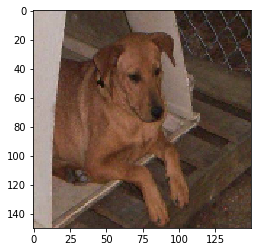

Augmented Image


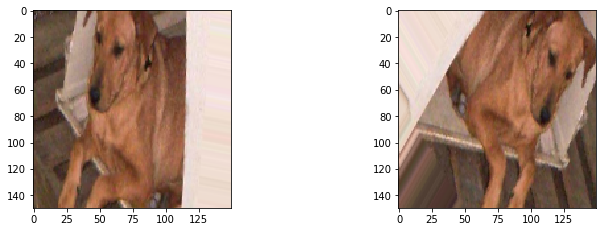

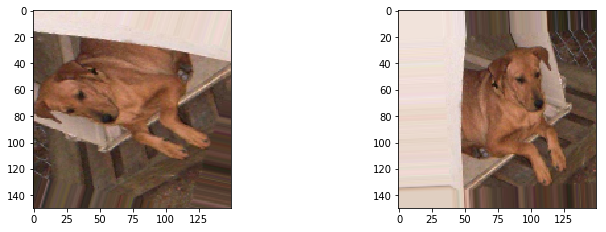

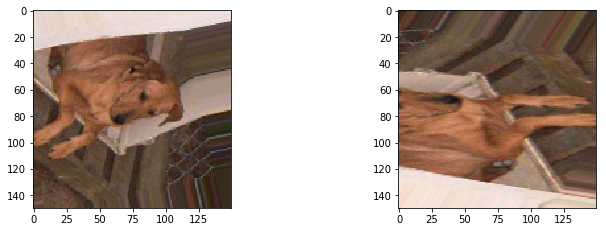

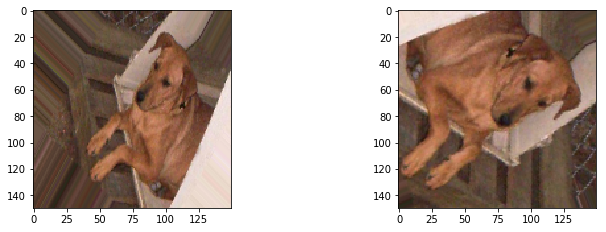

In [3]:
# This is module with image preprocessing utilities
from keras.preprocessing import image
import os
import matplotlib.pyplot as plt
%matplotlib inline 

fnames = [os.path.join(train_dogs_dir, fname) for fname in os.listdir(train_dogs_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))
plt.figure()
print("Original Image")
plt.imshow(img)
plt.show()

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
print("Augmented Image")
for batch in datagen_rotate.flow(x, batch_size=1):
    if i%2==0:
        fig=plt.figure(i,figsize=(12,8))
    ax2 = fig.add_subplot(2,2,(i%2)+1)
    ax2.imshow(image.array_to_img(batch[0]))  

    i += 1
    if i % 8 == 0:
        break
    
plt.show()

## Question - 2 

In [4]:
from keras.models import load_model

model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_______________________________________

In [5]:
from PIL import Image
import numpy as np
from keras.preprocessing import image

filename=r'C:\Users\anand\Downloads\NU Classes\Deep Learning\Slides and Code\HW 4\Lion_Img\dog01.jpg'
img = Image.open(filename).resize((150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


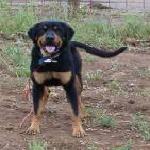

In [6]:
img

In [7]:
#Get the prediction
preds = model.predict_classes(img_tensor, verbose=2)
print(model.predict(img_tensor))
print(preds)

[[0.9845664]]
[[1]]


In [8]:
from PIL import Image
import numpy as np
from keras.preprocessing import image

filename=r'C:\Users\anand\Downloads\NU Classes\Deep Learning\Slides and Code\HW 4\Lion_Img\dog01.jpg'
img = Image.open(filename).resize((150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


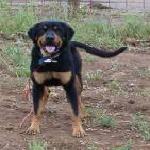

In [9]:
img

In [10]:
#Get the prediction
preds = model.predict_classes(img_tensor, verbose=2)
print(model.predict(img_tensor))
print(preds)

[[0.9845664]]
[[1]]


In [11]:
filename=r'C:\Users\anand\Downloads\NU Classes\Deep Learning\Slides and Code\HW 4\Lion_Img\02.jpg'
img = Image.open(filename).resize((150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


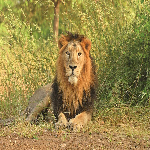

In [12]:
img

In [13]:
#Get the prediction
preds = model.predict_classes(img_tensor, verbose=2)
print(model.predict(img_tensor))
preds

[[0.999848]]


array([[1]])

In [14]:
from keras import models,layers

# Extracts the outputs of the layers:
layer_outputs = [layer.output for layer in model.layers]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [15]:
# one array per layer activation
activations = activation_model.predict(img_tensor)

### Get activations for the image

In [16]:
activations = activation_model.predict(img_tensor)

In [17]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


In [18]:
#Get layer names
layer_names=[]
for layer in model.layers:
    layer_names.append(layer.name)
layer_names

['conv2d_5',
 'max_pooling2d_5',
 'conv2d_6',
 'max_pooling2d_6',
 'conv2d_7',
 'max_pooling2d_7',
 'conv2d_8',
 'max_pooling2d_8',
 'flatten_2',
 'dropout_1',
 'dense_3',
 'dense_4']

Text(0.5,0.98,'conv2d_7')

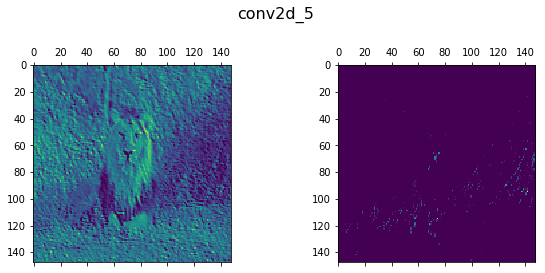

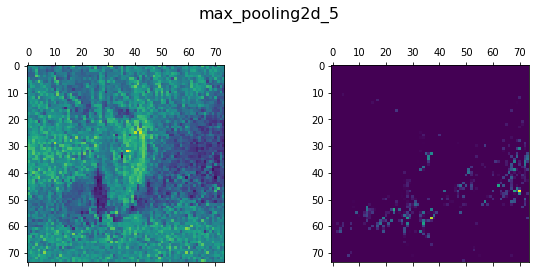

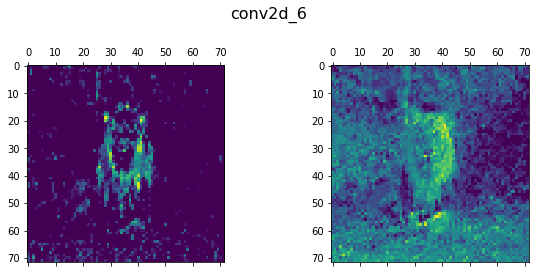

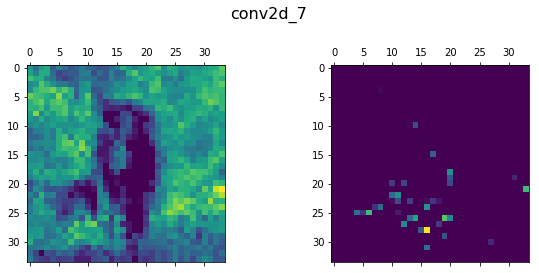

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(2,2,1)
ax1.matshow(activations[0][0, :, :, 3], cmap='viridis')

ax2 = fig.add_subplot(2,2,2)
ax2.matshow(activations[0][0, :, :, 30], cmap='viridis')
fig.suptitle(layer_names[0], fontsize=16)

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(2,2,1)
ax1.matshow(activations[1][0, :, :, 3], cmap='viridis')

ax2 = fig.add_subplot(2,2,2)
ax2.matshow(activations[1][0, :, :, 30], cmap='viridis')
fig.suptitle(layer_names[1], fontsize=16)


fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(2,2,1)
ax1.matshow(activations[2][0, :, :, 3], cmap='viridis')

ax2 = fig.add_subplot(2,2,2)
ax2.matshow(activations[2][0, :, :, 30], cmap='viridis')
fig.suptitle(layer_names[2], fontsize=16)


fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(2,2,1)
ax1.matshow(activations[4][0, :, :, 3], cmap='viridis')

ax2 = fig.add_subplot(2,2,2)
ax2.matshow(activations[4][0, :, :, 30], cmap='viridis')
fig.suptitle(layer_names[4], fontsize=16)